# Dimensionality reduction with PCA

In [1]:
#load MNIST dataset 

%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#use the first 10k in the training dataset (just for demo)
x_train = x_train[0:10000]
y_train = y_train[0:10000]

#normalize the images
x_train = np.expand_dims(x_train/255.0, axis=-1)
x_test = np.expand_dims(x_test/255.0, axis=-1)

#flatten the 2D images
x_train_f = np.transpose(np.reshape(x_train, [x_train.shape[0], -1]))
x_test_f = np.transpose(np.reshape(x_test, [x_test.shape[0], -1]))

#center the flattened images!
x_train_f_c = x_train_f - np.expand_dims(np.mean(x_train_f, axis=1), axis=1)
x_test_f_c = x_test_f - np.expand_dims(np.mean(x_test_f, axis=1), axis=1)

print(x_train_f_c.shape)
print(x_test_f_c.shape)

#define the labels
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

print(x_train.shape)
print(x_test.shape)

(784, 10000)
(784, 10000)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [2]:
#plot function for sample images

def plot_tile(samples):
    
    num_samples, x_dim, y_dim, _ = samples.shape
    axes = (np.round(np.sqrt(num_samples))).astype(int)
    fig = plt.figure(figsize=(axes, axes))
    gs = gridspec.GridSpec(axes, axes)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_aspect('equal')
        plt.imshow(sample, cmap=plt.get_cmap('viridis'), aspect='auto')

Number of training data points (1001, 28, 28, 1)
Number of training data points (1127, 28, 28, 1)
Number of training data points (991, 28, 28, 1)
Number of training data points (1032, 28, 28, 1)
Number of training data points (980, 28, 28, 1)
Number of training data points (863, 28, 28, 1)
Number of training data points (1014, 28, 28, 1)
Number of training data points (1070, 28, 28, 1)
Number of training data points (944, 28, 28, 1)
Number of training data points (978, 28, 28, 1)


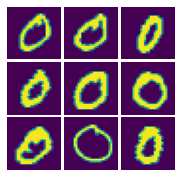

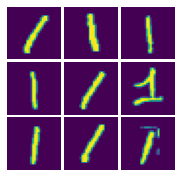

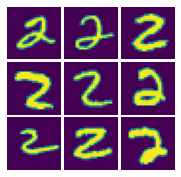

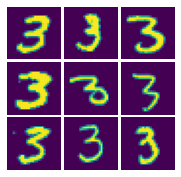

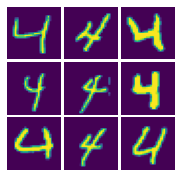

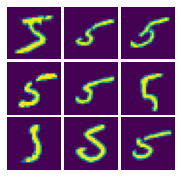

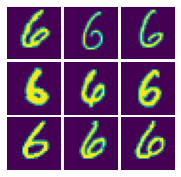

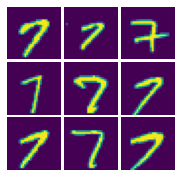

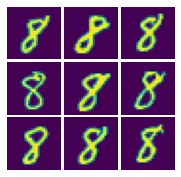

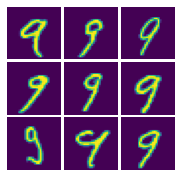

In [3]:
#visualize first 9 samples of input images based on class labels, within the training dataset

unique_labels, label_counts = np.unique(y_train, return_counts=True)

for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    print("Number of training data points {}".format(x_train_perlabel.shape))
    fig = plot_tile(x_train_perlabel[0:9, :, :])

In [4]:
#run SVD on the matrix of images and construct diag matrix

U, S, VT = np.linalg.svd(x_train_f_c, full_matrices=False)
S = np.diag(S)

print(U.shape)
print(S.shape)
print(VT.shape)

(784, 784)
(784, 784)
(784, 10000)


In [7]:
#projection (v) on the first k bases

k = 3                                         #try a few numbers~
v = (np.linalg.pinv(U[:, :k])@x_test_f_c).T
print(v.shape)

(10000, 3)


In [33]:
#np.save("z_test_PCA.npy", v)

Text(0.5, 1.0, &#39;Projections&#39;)

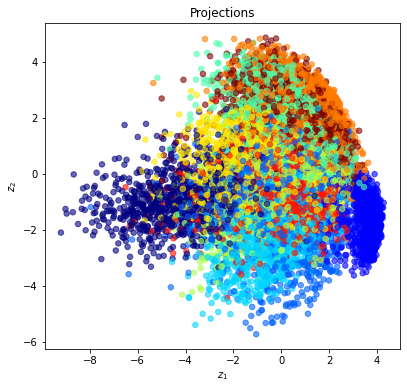

In [8]:
#lets visualize the projections by class label (a.k.a eigenspaces)

import matplotlib.cm as cm
from matplotlib.colors import Normalize

my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)
cs = my_cmap(my_norm(y_test))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(v[:, 0], v[:, 1], s=30, c=cs, alpha=0.6)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('Projections')

In [9]:
#reconstruction with the first k bases

x_test_f_c_hat = U[:, :k]@v.T
x_test_f_hat = x_test_f_c_hat + np.expand_dims(np.mean(x_train_f, axis=1), axis=1)

x_test_hat = np.reshape(x_test_f_hat.T, [-1, 28, 28])

print(x_test_f_c_hat.shape)
print(x_test_f_hat.shape)
print(x_test_hat.shape)

(784, 10000)
(784, 10000)
(10000, 28, 28)


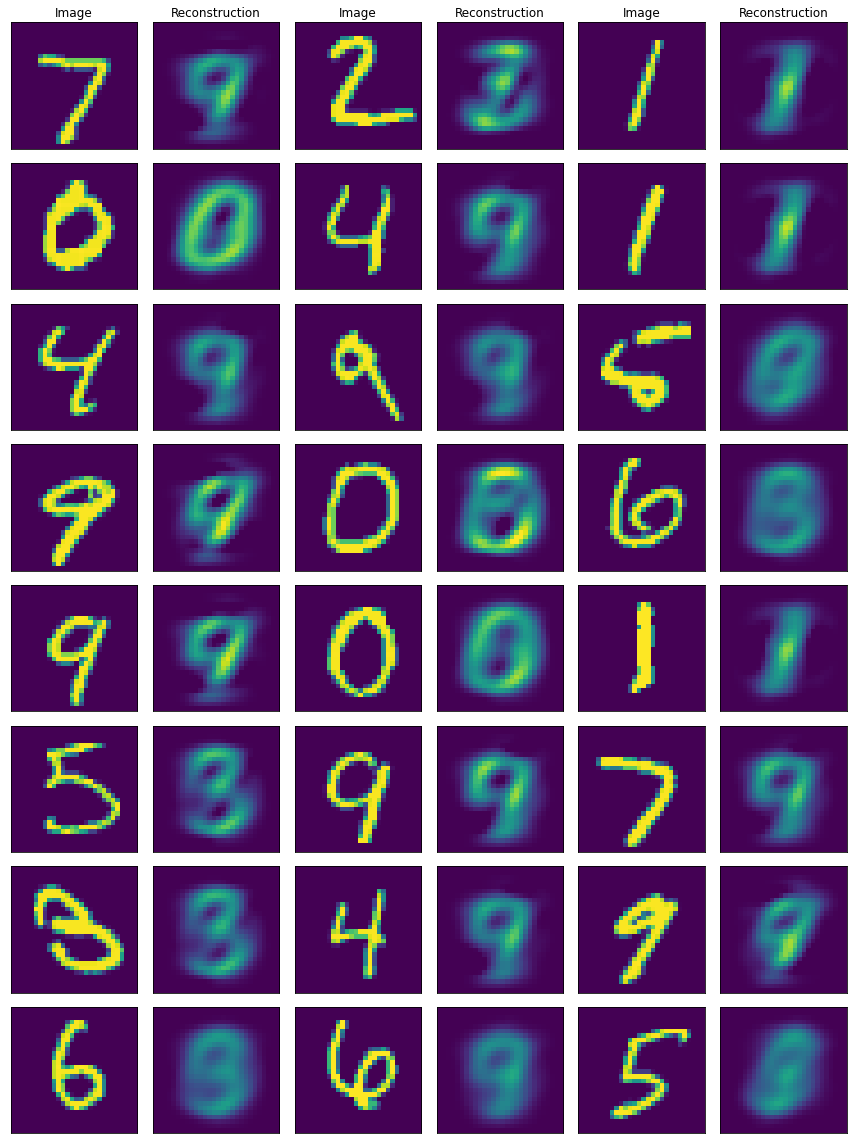

In [10]:
#compare original and reconstructions

#plot some test images with predicted vs true labels
#correct predictions (colored blue) and incorrect predictions (colored red)

num_rows = 8
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], vmin=0, vmax=1)
    if i < 3:
        plt.title('Image')
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_hat[i], vmin=0, vmax=1)
    if i < 3:
        plt.title('Reconstruction')
    
plt.tight_layout()
plt.show()


## Latent space exploration

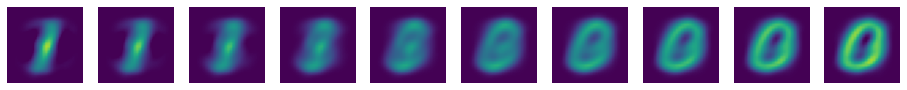

In [17]:
sample_1_z = v[2:3]
sample_2_z = v[3:4]

num_samples = 10
samples_z = np.squeeze(np.linspace(sample_1_z, sample_2_z, num_samples, endpoint=True))

#display the reconstructed images from the samples
samples_image = np.zeros([num_samples, x_test.shape[1], x_test.shape[2], 1])
for i in range(num_samples):
    tmp = U[:, :k]@samples_z[i:i+1, :].T + np.expand_dims(np.mean(x_train_f, axis=1), axis=1)
    samples_image[i, :, :, 0] = np.reshape(tmp.T, [28, 28])

#display sampled images
plt.figure(figsize=[16, 4])
for i in range(num_samples):
    plt.subplot(1, 10, i+1)
    plt.imshow(np.squeeze(samples_image[i:i+1]), vmin=0, vmax=1)
    plt.axis('off')

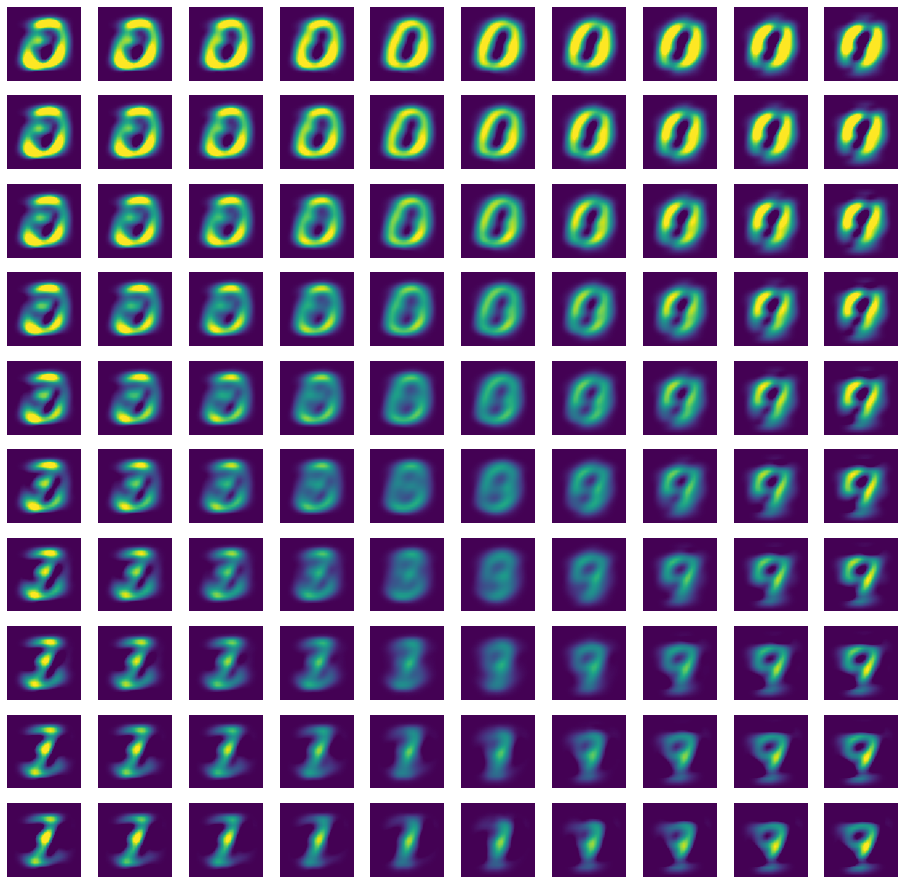

In [29]:
#sample a grid, uniformly sample the first two zs, and for the rest, use the mean zs
z_dim= 3
samples_z_grid = np.ones([num_samples, num_samples, num_samples, z_dim])
samples_image_grid = np.ones([num_samples, num_samples, num_samples, x_test.shape[1], x_test.shape[2], 1])

z1_min = v[:, 0].min()
z1_max = v[:, 0].max()
z2_min = v[:, 1].min()
z2_max = v[:, 1].max()
z3_min = v[:, 2].min()
z3_max = v[:, 2].max()

samples_z1 = np.linspace(z1_min, z1_max, num_samples, endpoint=True)
samples_z2 = np.linspace(z2_min, z2_max, num_samples, endpoint=True)
samples_z3 = np.linspace(z3_min, z3_max, num_samples, endpoint=True)

for i in range(num_samples):
    for j in range(num_samples):
        for k in range(num_samples):
            samples_z_grid[i, j, k, 0] = samples_z1[i]
            samples_z_grid[i, j, k, 1] = samples_z2[j]
            samples_z_grid[i, j, k, 2] = samples_z3[k]

for i in range(num_samples):
    for j in range(num_samples):
        for k in range(num_samples):
            tmp = U[:, :3]@np.expand_dims(samples_z_grid[i, j ,k, :], axis=1) + np.expand_dims(np.mean(x_train_f, axis=1), axis=1)
            samples_image_grid[i, j, k, :, :, :] = np.reshape(tmp.T, [28, 28, 1])

#display sampled images
plt.figure(figsize=[16, 16])
for i in range(num_samples):
    for j in range(num_samples):
        k = 5
        plt.subplot(10, 10, i*num_samples + j + 1)
        plt.imshow(np.squeeze(samples_image_grid[i, j, k, :, :, :] ), vmin=0, vmax=1)
        plt.axis('off')

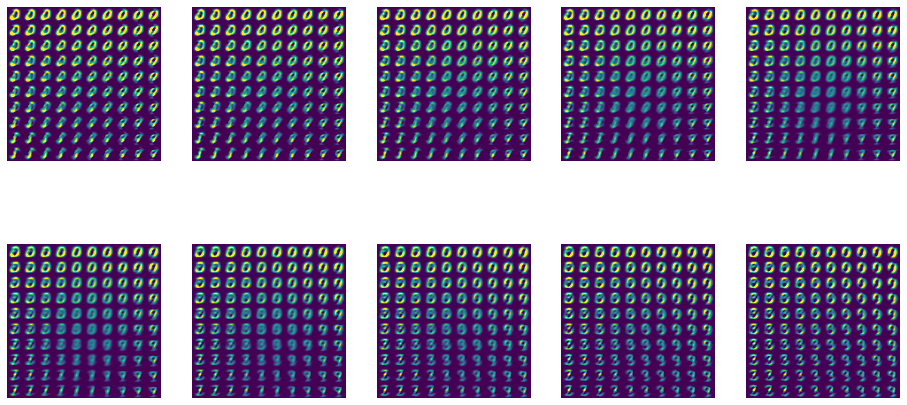

In [30]:
#tile the image into a cube of (28x10, 28x10, 10)
samples_image_cube = np.ones([num_samples*x_test.shape[1], num_samples*x_test.shape[2], num_samples])

for k in range(num_samples):
    for i in range(num_samples):
        for j in range(num_samples):
                i_idx_start = i*x_test.shape[1]
                i_idx_end = i_idx_start + x_test.shape[1]
                j_idx_start = j*x_test.shape[2]
                j_idx_end = j_idx_start + x_test.shape[2]
                samples_image_cube[i_idx_start:i_idx_end, j_idx_start:j_idx_end, k] = samples_image_grid[i, j, k, :, :, 0]

plt.figure(figsize=[16, 8])
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples_image_cube[:, :, i], vmin=0, vmax=1)
    plt.axis('off')


&lt;IPython.core.display.Image object&gt;

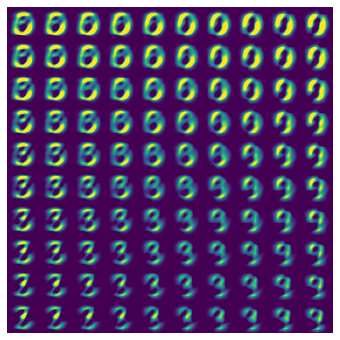

In [32]:
#create GIF
#flip the GIF
from matplotlib import animation, rc
from IPython.display import HTML, Image
plt.rcParams['animation.html'] = 'jshtml'

nfr = num_samples     # Depth
fps = 2      # Frame per sec Speed of simulation 

fig = plt.figure(figsize=[6, 6])
im = plt.imshow(np.flipud(samples_image_cube[:, :, 0]), vmin=0, vmax=1, origin="upper")
plt.xlim(0, num_samples*x_test.shape[1])
plt.ylim(0, num_samples*x_test.shape[2])
plt.axis('off')

def update(ifrm, samples_image_cube, nfr):
    im.set_array(np.flipud(samples_image_cube[:, :, ifrm]))

ani = animation.FuncAnimation(fig, update, nfr, fargs=(samples_image_cube, nfr), interval=300)
HTML(ani.to_jshtml())

ani.save('PCA.gif', writer='pillow', fps=fps)
Image(url='PCA.gif')

In [34]:
#calculate RMSE for test data
RMSE = np.sqrt(np.mean((x_test.flatten() - x_test_hat.flatten())**2))
print(RMSE)

0.22753792862235647
